In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
titaniic = pd.read_csv("titanic.csv")

In [135]:
titaniic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
titaniic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
titaniic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [138]:
titaniic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
titaniic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

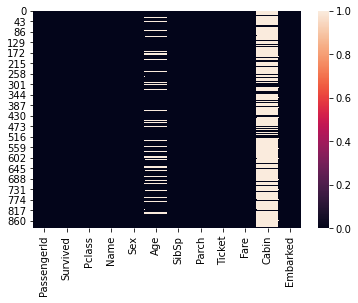

In [140]:
sns.heatmap(titaniic.isna());

In [141]:
total = titaniic.isnull().sum().sort_values(ascending=False)
percent_1 =titaniic.isnull().sum()/titaniic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

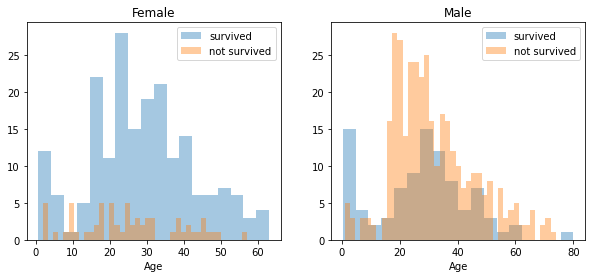

In [142]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titaniic[titaniic['Sex']=='female']
men = titaniic[titaniic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


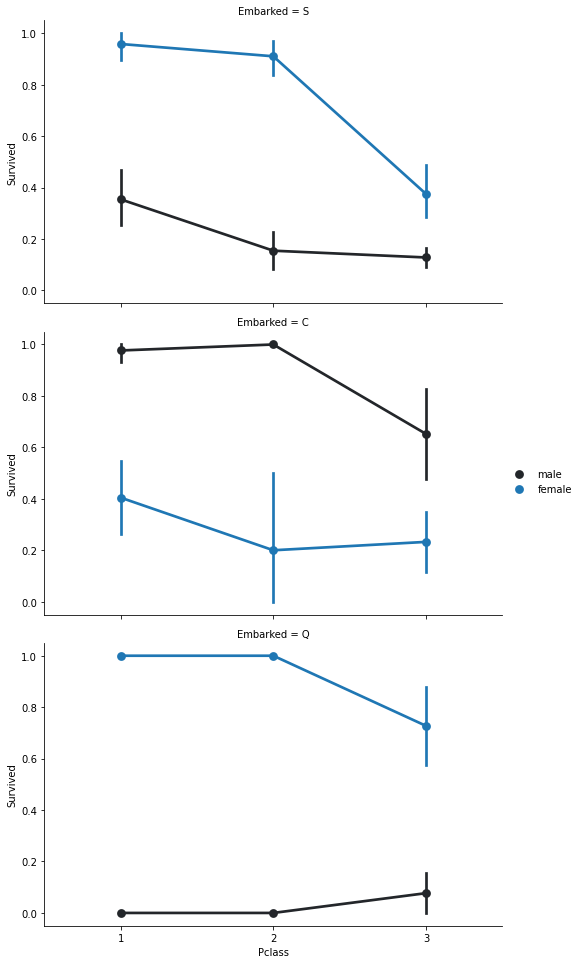

In [143]:
FacetGrid = sns.FacetGrid(titaniic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend();

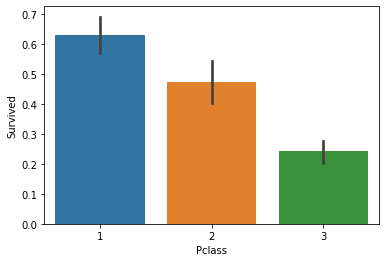

In [144]:
sns.barplot(x='Pclass', y='Survived', data=titaniic);

In [145]:
data = [titaniic, titaniic]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

# data perprossing

In [146]:
data = [titaniic, titaniic]

for dataset in data:
    mean = titaniic["Age"].mean()
    std = titaniic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titaniic["Age"].astype(int)

In [147]:
titaniic["Age"].isnull().sum()

0

In [148]:
titaniic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [149]:
common_value = 'S'
data = [titaniic,titaniic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [150]:
titaniic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  relatives    891 non-null    int64  
 13  not_alone    891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(5)
memory usage: 90.6+ KB


In [151]:
data = [titaniic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [152]:
data = [titaniic, titaniic]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = titaniic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [153]:
titaniic = titaniic.drop(['Name'], axis=1)

In [154]:
genders = {"male": 0, "female": 1}
data = [titaniic, titaniic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [155]:
titaniic['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [156]:
titaniic = titaniic.drop(['Ticket'], axis=1)

In [157]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titaniic, titaniic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [158]:
data = [titaniic, titaniic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [159]:
titaniic['Age'].value_counts()

0    891
Name: Age, dtype: int64

In [160]:
titaniic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title
0,1,0,3,NaN,0,1,0,7,NaN,NaN,1,0,1
1,2,1,1,NaN,0,1,0,71,C85,NaN,1,0,3
2,3,1,3,NaN,0,0,0,7,NaN,NaN,0,1,2
3,4,1,1,NaN,0,1,0,53,C123,NaN,1,0,3
4,5,0,3,NaN,0,0,0,8,NaN,NaN,0,1,1
5,6,0,3,NaN,0,0,0,8,NaN,NaN,0,1,1
6,7,0,1,NaN,0,0,0,51,E46,NaN,0,1,1
7,8,0,3,NaN,0,3,1,21,NaN,NaN,4,0,4
8,9,1,3,NaN,0,0,2,11,NaN,NaN,2,0,3
9,10,1,2,NaN,0,1,0,30,NaN,NaN,1,0,3


In [161]:
data = [titaniic, titaniic]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating new Features

In [162]:
data = [titaniic, titaniic]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [163]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [164]:
titaniic.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,1,0,3,NaN,0,1,0,0,NaN,NaN,1,0,1,0,0
1,2,1,1,NaN,0,1,0,0,C85,NaN,1,0,3,0,0
2,3,1,3,NaN,0,0,0,0,NaN,NaN,0,1,2,0,0
3,4,1,1,NaN,0,1,0,0,C123,NaN,1,0,3,0,0
4,5,0,3,NaN,0,0,0,0,NaN,NaN,0,1,1,0,0
5,6,0,3,NaN,0,0,0,0,NaN,NaN,0,1,1,0,0
6,7,0,1,NaN,0,0,0,0,E46,NaN,0,1,1,0,0
7,8,0,3,NaN,0,3,1,0,NaN,NaN,4,0,4,0,0
8,9,1,3,NaN,0,0,2,0,NaN,NaN,2,0,3,0,0
9,10,1,2,NaN,0,1,0,0,NaN,NaN,1,0,3,0,0


In [165]:
titaniic.dropna(axis = 1, inplace = True)
titaniic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,1,0,3,0,1,0,0,1,0,1,0,0
1,2,1,1,0,1,0,0,1,0,3,0,0
2,3,1,3,0,0,0,0,0,1,2,0,0
3,4,1,1,0,1,0,0,1,0,3,0,0
4,5,0,3,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,0,0,1,5,0,0
887,888,1,1,0,0,0,0,0,1,2,0,0
888,889,0,3,0,1,2,0,3,0,2,0,0
889,890,1,1,0,0,0,0,0,1,1,0,0


# Building Machine Learning Models for Classification

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [167]:
X_train = titaniic.drop("Survived", axis=1)
Y_train = titaniic["Survived"]
X_test  = titaniic.drop("PassengerId", axis=1).copy()

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.25)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [169]:
# display the accurate
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy of KNeighborsClassifier = {accuracy}")

Accuracy of KNeighborsClassifier = 0.8116591928251121


In [170]:
X= titaniic.drop('Survived',axis=1)
y= titaniic['Survived'] #trying to predict

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
model = LinearRegression()

In [183]:
model.fit(X_train,y_train)

LinearRegression()

In [184]:
predictions = model.predict(X_test)

In [185]:
from sklearn.metrics import classification_report

In [178]:
accuracy = accuracy_score(y_test, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [268, 223]